# 6.6B Experimenting with 'Ingredients' and 'Memorable Charateristics'

# Contents
    1. Importing Libraries
    2. Importing Data
    3. Data Cleaning
    4. Exploring the highest rated chocolate bars
    5. Export data

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab module- bulk imports matplotlib.

# 2. Importing Data

In [2]:
path = '/Users/bdigregorio/Desktop/CareerFoundry/Data Immersion/Data Immersion 6/Flavors of Cacao Analysis'

In [3]:
df_fc3_B = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'df_fc3_B.xlsx'))

In [4]:
df_fc3_B.head()

,Unnamed: 0,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Cocoa Level,Number_of_Ingredients,Ingredient Level,Rating,Rating Level,Ingredients_abbr,Most Memorable Characteristics
0,0,Manoa,U.S.A.,2012,Liberia,"Liberia, batch 174",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molassses, intense, off, herb"
1,1,Manoa,U.S.A.,2012,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.72,Mid percent,3,3,2.75,Mid-level,"B,S,C","oily, tangy, fruit, earthy"
2,2,Manoa,U.S.A.,2012,Peru,"Piura, batch 173",0.72,Mid percent,3,3,3.00,Mid-level,"B,S,C","banana, menthol, medicinal"
3,3,Manoa,U.S.A.,2012,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molasses, sweet, cocoa"
4,4,Nanea,U.S.A.,2013,U.S.A.,Criollo Blend,0.85,High percent,3,3,3.50,Mid-level,NaN,"sandy, spicy, earthy"


# 3. Data Cleaning

In [5]:
# drop unwanted column 'Unnamed: 0'
df_fc3_B.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# check drop
df_fc3_B.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Cocoa Level,Number_of_Ingredients,Ingredient Level,Rating,Rating Level,Ingredients_abbr,Most Memorable Characteristics
0,Manoa,U.S.A.,2012,Liberia,"Liberia, batch 174",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molassses, intense, off, herb"
1,Manoa,U.S.A.,2012,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.72,Mid percent,3,3,2.75,Mid-level,"B,S,C","oily, tangy, fruit, earthy"
2,Manoa,U.S.A.,2012,Peru,"Piura, batch 173",0.72,Mid percent,3,3,3.00,Mid-level,"B,S,C","banana, menthol, medicinal"
3,Manoa,U.S.A.,2012,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molasses, sweet, cocoa"
4,Nanea,U.S.A.,2013,U.S.A.,Criollo Blend,0.85,High percent,3,3,3.50,Mid-level,NaN,"sandy, spicy, earthy"


In [7]:
df_fc3_B.isnull().sum()

Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Cocoa Level                          0
Number_of_Ingredients                0
Ingredient Level                     0
Rating                               0
Rating Level                         0
Ingredients_abbr                    87
Most Memorable Characteristics       0
dtype: int64

### As mentioned in earlier notebooks, I believe it is impossible to impute ingredients. However, I want to explore the ingrediendts data and the 'Most Memorable Characteristics' so I will leave the NaNs for now.

***Looking into "Ingredients" by changing the abreviations to the full ingredient name***

In [8]:
df_fc3_B['Ingredients_abbr'].unique().tolist()

['B,S,C',
 nan,
 'B,S,C,L',
 'B,S',
 'B,S,C,V',
 'B,S,C,V,L',
 'B,S,C,L,Sa',
 'B',
 'B,S,L',
 'B,S*,Sa',
 'B,S,C,Sa',
 'B,S,V,L',
 'B,S*,C,Sa',
 'B,S,C,V,L,Sa',
 'B,S,C,V,Sa',
 'B,S*,C',
 'B,S*',
 'B,S*,V,L',
 'B,S,V',
 'B,S*,C,V',
 'B,C',
 'B,S*,C,L']

In [9]:
df_fc3_B['Ingredients_abbr'].value_counts()

B,S,C           1084
B,S              752
B,S,C,L          293
B,S,C,V,L        184
B,S,C,V          141
B,S*              31
B,S*,C,Sa         20
B,S*,C            13
B,S,L              8
B,S*,C,V           7
B,S,C,V,Sa         6
B                  6
B,S,V,L            5
B,S,C,Sa           5
B,S,C,V,L,Sa       4
B,S*,V,L           3
B,S,V              3
B,S*,C,L           2
B,S*,Sa            1
B,S,C,L,Sa         1
B,C                1
Name: Ingredients_abbr, dtype: int64

In [10]:
# changing ingredient abbreviations to full names found in the original Excel data notes
mapping_ingredients_full = {
    'B' : 'Beans',
    'S' : 'Sugar',
    'S*': 'Sweetener',
    'C' : 'Cocoa Butter',
    'V' : 'Vanilla',
    'L' : 'Lecithin',
    'Sa': 'Salt'
}

### problems arose when continuing because pandas does not like NaN values!<br>Hence the next line below....

In [11]:
# Replace NaN values with an empty string
df_fc3_B['Ingredients_abbr'] = df_fc3_B['Ingredients_abbr'].fillna('no info')

# Split the values in 'Ingredients_abbr' by comma and replace each individual component
df_fc3_B['Ingredients_full'] = df_fc3_B['Ingredients_abbr'].str.split(',').apply(lambda x: [mapping_ingredients_full.get(item, item) for item in x]).str.join(',')


In [12]:
# re-ordering the columns for easier view of related column names
df_fc3_B = df_fc3_B[['Company (Manufacturer)','Company Location', 'Review Date', 
                 'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
                 'Cocoa Percent','Cocoa Level',
                 'Number_of_Ingredients', 'Ingredient Level',
                 'Rating','Rating Level',
                 'Ingredients_abbr', 'Ingredients_full','Most Memorable Characteristics']]

In [13]:
df_fc3_B.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Cocoa Level,Number_of_Ingredients,Ingredient Level,Rating,Rating Level,Ingredients_abbr,Ingredients_full,Most Memorable Characteristics
0,Manoa,U.S.A.,2012,Liberia,"Liberia, batch 174",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","Beans,Sugar,Cocoa Butter","molassses, intense, off, herb"
1,Manoa,U.S.A.,2012,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.72,Mid percent,3,3,2.75,Mid-level,"B,S,C","Beans,Sugar,Cocoa Butter","oily, tangy, fruit, earthy"
2,Manoa,U.S.A.,2012,Peru,"Piura, batch 173",0.72,Mid percent,3,3,3.00,Mid-level,"B,S,C","Beans,Sugar,Cocoa Butter","banana, menthol, medicinal"
3,Manoa,U.S.A.,2012,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","Beans,Sugar,Cocoa Butter","molasses, sweet, cocoa"
4,Nanea,U.S.A.,2013,U.S.A.,Criollo Blend,0.85,High percent,3,3,3.50,Mid-level,no info,no info,"sandy, spicy, earthy"


In [14]:
df_fc3_B['Ingredients_full'].value_counts()

Beans,Sugar,Cocoa Butter                          1084
Beans,Sugar                                        752
Beans,Sugar,Cocoa Butter,Lecithin                  293
Beans,Sugar,Cocoa Butter,Vanilla,Lecithin          184
Beans,Sugar,Cocoa Butter,Vanilla                   141
no info                                             87
Beans,Sweetener                                     31
Beans,Sweetener,Cocoa Butter,Salt                   20
Beans,Sweetener,Cocoa Butter                        13
Beans,Sugar,Lecithin                                 8
Beans,Sweetener,Cocoa Butter,Vanilla                 7
Beans,Sugar,Cocoa Butter,Vanilla,Salt                6
Beans                                                6
Beans,Sugar,Vanilla,Lecithin                         5
Beans,Sugar,Cocoa Butter,Salt                        5
Beans,Sugar,Cocoa Butter,Vanilla,Lecithin,Salt       4
Beans,Sweetener,Vanilla,Lecithin                     3
Beans,Sugar,Vanilla                                  3
Beans,Swee

<Figure size 600x400 with 0 Axes>

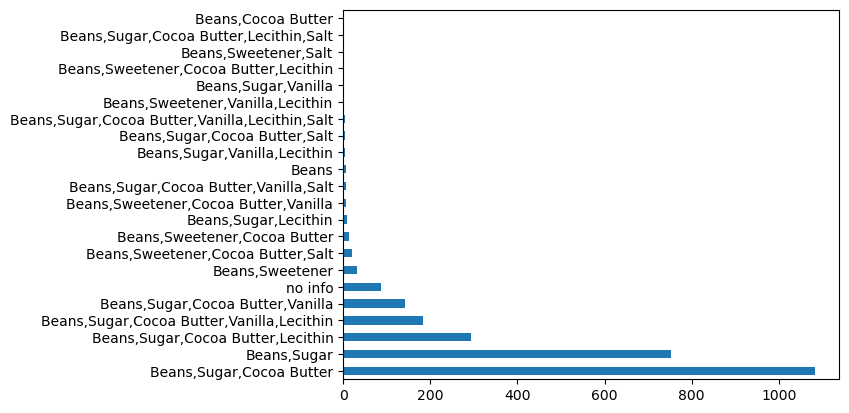

<Figure size 600x400 with 0 Axes>

In [15]:
# Create a bar chart of the value counts of 'Ingredients_full'
df_fc3_B['Ingredients_full'].value_counts().plot.barh()
plt.figure(figsize=(6, 4))

In [16]:
df_fc3_B['Most Memorable Characteristics'].value_counts()

spicy, cocoa                   4
creamy, nutty, cocoa           4
sandy, sweet, cocoa            3
sweet, marshmallow             3
cherry, rich choco             3
                              ..
creamy, sweet, deep choco      1
robust dark tropical fruit     1
sticky, mellow choco, dairy    1
sticky, off notes of rubber    1
chalky, fragrant, then off     1
Name: Most Memorable Characteristics, Length: 2614, dtype: int64

In [17]:
df_fc3_B['Most Memorable Characteristics'].unique().tolist()

['molassses, intense, off, herb',
 'oily, tangy, fruit, earthy',
 'banana, menthol, medicinal',
 'molasses, sweet, cocoa',
 'sandy, spicy, earthy',
 'brief fruit note, earthy, nutty',
 'sticky, red fruit, sour',
 'mild tobacco',
 'sandy, nutty, cocoa, fig',
 'burnt rubber,alkalyzed notes',
 'sticky, smokey, grass',
 'mild fruit, strong smoke',
 'oily, nut, caramel, raspberry',
 'green, nutty, cocoa',
 'cocoa,sour,intense tangerine',
 'sweet, cocoa, tangerine',
 'smoke, burnt caramel, citrus',
 'spicy, red fruit, raisins',
 'single note, spicy',
 'roasty, sligt burnt, red fruit',
 'basic cocoa',
 'roasty, bitter, caramel, dairy',
 'acidic, sour, cocoa',
 'licorice, sour, rich cocoa',
 'mildly burnt caramel',
 'cardamon',
 'strawberry, blueberry',
 'creamy, smokey, some fruit',
 'oily, burnt black pepper',
 'baked bread',
 'creamy, cocoa, grapes',
 'oily, black pepper, roasty',
 'sandy, vegetal, sour',
 'tart, fruity, intense',
 'creamy, heavy roast, citrus',
 'oily, roasted nuts, rich c

# 4. Exploring the highest rated chocolate bars below:

In [18]:
# finding the full ingredients for the highest rated chocolate bars
# Filter the DataFrame to select rows where 'Rating Level' is 'Highest'
highest_rating_df = df_fc3_B[df_fc3_B['Rating Level'] == 'Highest']



In [19]:
highest_rating_df['Ingredients_full'].value_counts()

Beans,Sugar,Cocoa Butter                     60
Beans,Sugar                                  26
Beans,Sugar,Cocoa Butter,Lecithin            15
Beans,Sugar,Cocoa Butter,Vanilla,Lecithin    11
Beans,Sugar,Cocoa Butter,Vanilla              2
no info                                       1
Name: Ingredients_full, dtype: int64

<Figure size 600x400 with 0 Axes>

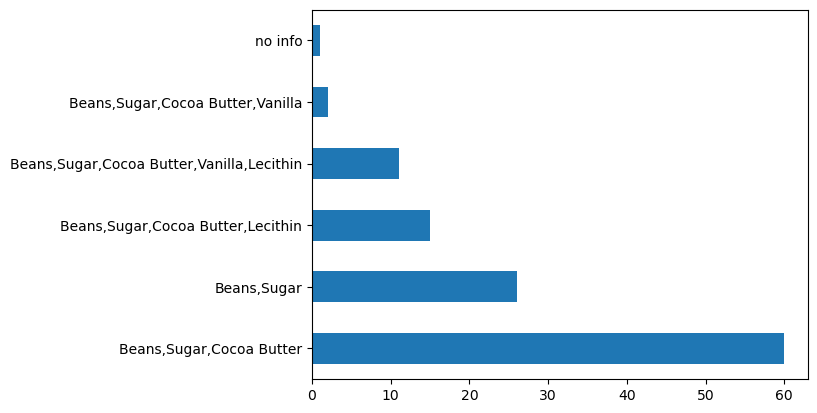

<Figure size 600x400 with 0 Axes>

In [20]:
# Create a bar chart of the value counts of 'Ingredients_full'
highest_rating_df['Ingredients_full'].value_counts().plot.barh()
plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

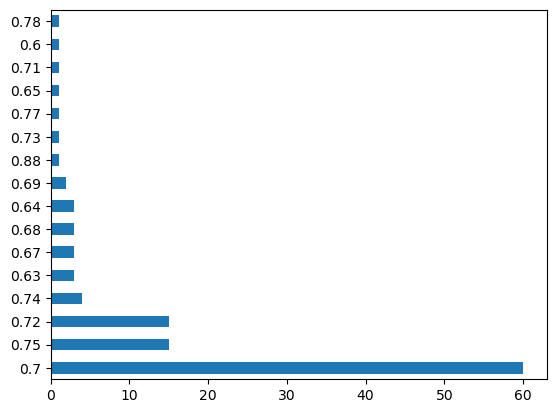

<Figure size 600x400 with 0 Axes>

In [21]:
highest_rating_df['Cocoa Percent'].value_counts().plot.barh()
plt.figure(figsize=(6, 4))

<Axes: >

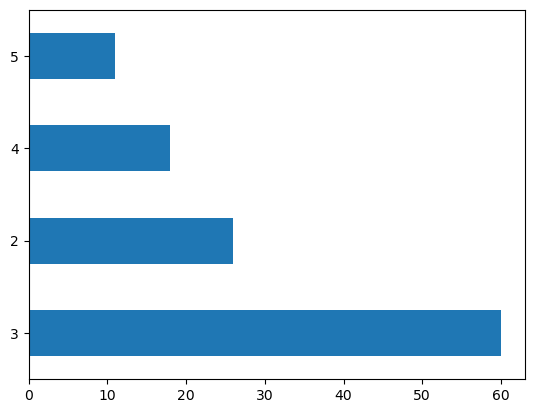

In [22]:
highest_rating_df['Number_of_Ingredients'].value_counts().plot.barh()

### Exploring highest rated bars with 3 ingredients:

In [23]:
highest_rating_3_ingredients = highest_rating_df[highest_rating_df['Number_of_Ingredients'] == 3]


In [24]:
highest_rating_df.columns

Index(['Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Cocoa Level', 'Number_of_Ingredients',
       'Ingredient Level', 'Rating', 'Rating Level', 'Ingredients_abbr',
       'Ingredients_full', 'Most Memorable Characteristics'],
      dtype='object')

In [25]:
highest_rating_3_ingredients.columns

Index(['Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Cocoa Level', 'Number_of_Ingredients',
       'Ingredient Level', 'Rating', 'Rating Level', 'Ingredients_abbr',
       'Ingredients_full', 'Most Memorable Characteristics'],
      dtype='object')

<Figure size 600x400 with 0 Axes>

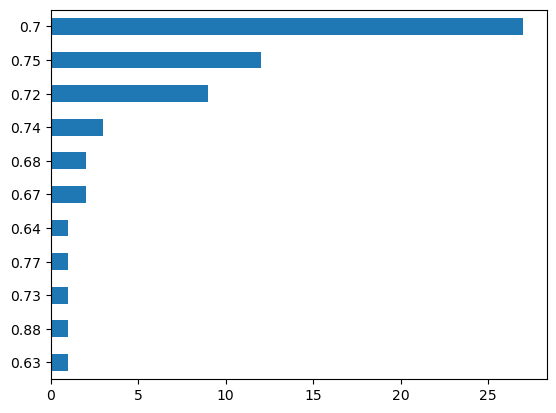

<Figure size 600x400 with 0 Axes>

In [26]:
# Create a bar chart of the highest rated bars which have 3 ingredients
highest_rating_3_ingredients['Cocoa Percent'].value_counts(ascending=True).plot.barh()
plt.figure(figsize=(6, 4))

In [27]:
highest_rating_3_ingredients['Ingredients_full'].value_counts()

Beans,Sugar,Cocoa Butter    60
Name: Ingredients_full, dtype: int64

In [28]:
highest_rating_3_ingredients['Company Location'].value_counts()

U.S.A.         19
Canada         16
France          9
Switzerland     5
Australia       4
Belgium         2
U.K.            2
Denmark         2
Scotland        1
Name: Company Location, dtype: int64

In [29]:
highest_rating_3_ingredients['Specific Bean Origin or Bar Name'].value_counts()

Haiti                                               2
Madagascar                                          2
Chuao                                               2
Piura                                               2
Chanchamayo Province                                1
El Rosario, Xoconuzco, Cusco, Sambirano             1
Fazenda Camboa, 2017 harvest                        1
Piura, Gran Blanco, lot 400                         1
Valle de Los Rios, batch 990                        1
Chuao Village, BR-SC, batch 21-437                  1
Chuao, batch 1089                                   1
Ben Tre, batch BEN210924 8983                       1
Costa Esmeraldas, CEconche77121620121820            1
Semuliki Forest, Bundibugyo, b. 13416SEM220426      1
Maracaibo, El Rosario                               1
Ecuador                                             1
Madagascar, 100% criollo                            1
Choroni, Aragua, Finca Torres Farm                  1
Three Amigos(Chuao, Wild Bol

In [30]:
highest_rating_3_ingredients['Most Memorable Characteristics'].value_counts()

sweet, cocoa, tangerine             1
creamy, cocoa, grapes               1
creamy, rich, complex               1
creamy, dried fruit, nutty          1
fig                                 1
grapes and honey                    1
complex, strawberry, floral         1
robust cocoa, dried cranberry       1
mild strawberry, cocoa, acidic      1
cinamon, nutmeg, hot cocoa          1
complex, hazelnut, dairy, fruit     1
creamy,choco strawberry,vanilla     1
simple red berry, rich, long        1
creamy, fatty, floral               1
grassy, black pepper                1
fatty, spicy, gentle roast          1
creamy, nutty, cocoa                1
strawberry, cocoa, nutty            1
complex,spice,caramel,cocoa         1
nuts, butterscotch, brownie         1
creamy, nutty, delicate fruit       1
creamy, nutty, fruity               1
peanut, coffee, cocoa, bread        1
creamy, nutty, earthy               1
tart, roasted cocoa                 1
smokey, raspberries, cocoa          1
creamy, coco

## As seen earlier, most bars have 3 ingredients: Beans,Sugar,Cocoa Butter and a cocao percent of 70 percent, including the highest rated bars (Rating of 4).

# 5. Export data

In [31]:
# Export df_fc3 again to have Ingredients_full column
df_fc3_B.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_flavors.xlsx'))